- Run this after predictions to check if tiling worked correctly.
- Random tiles are sampled — if only background is selected, a black image will be shown.

Predicted images only

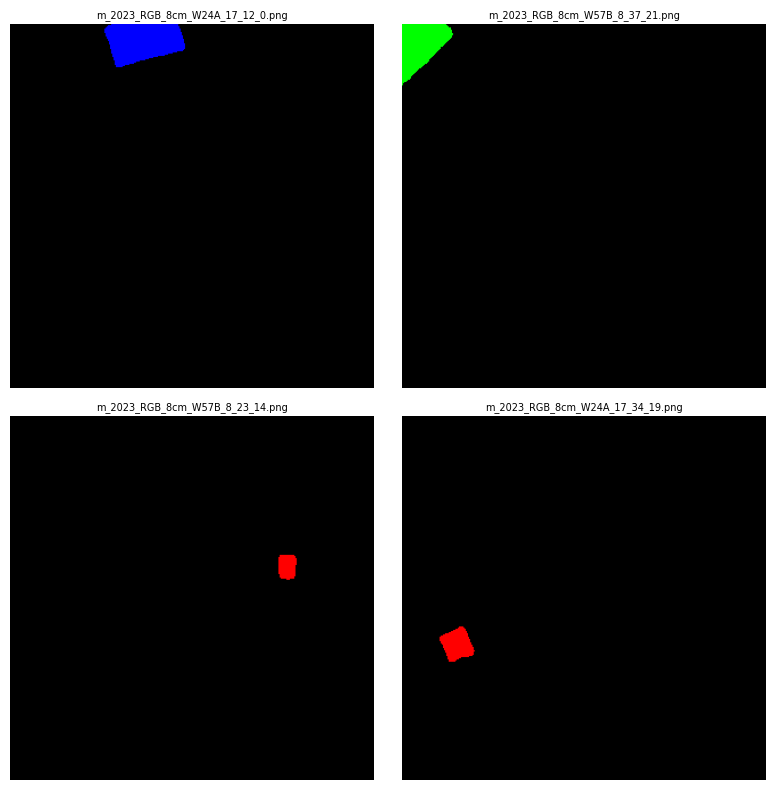

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# ───────────────────────────────
# mask
mask_dir = "/shared/data/climateplus2025/YOLO+U-Net_Prediction_3images_updated_head_to_head_comparision_0722/prediction_masks_tiles_320"  # Directory containing mask images

# RGB mapping
color_map = {
    0: (0, 0, 0),        # background: black
    1: (0, 255, 0),      # PV_normal: green
    2: (255, 0, 0),      # PV_heater: red
    3: (0, 0, 255),      # PV_pool: blue
}

def mask_to_rgb(mask):
    rgb = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
    for cls, color in color_map.items():
        rgb[mask == cls] = color
    return rgb

all_files = [
    f for f in os.listdir(mask_dir)
    if f.endswith(".png") and os.path.isfile(os.path.join(mask_dir, f))
]
sample_files = random.sample(all_files, 4) # Randomly select 4 files for visualization

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for ax, fname in zip(axs.flat, sample_files):
    path = os.path.join(mask_dir, fname)
    mask = np.array(Image.open(path))
    rgb = mask_to_rgb(mask)
    ax.imshow(rgb)
    ax.set_title(fname, fontsize=7, wrap=True, pad=4)
    ax.axis('off')

plt.tight_layout()
plt.show()


Predicted images with GT mask

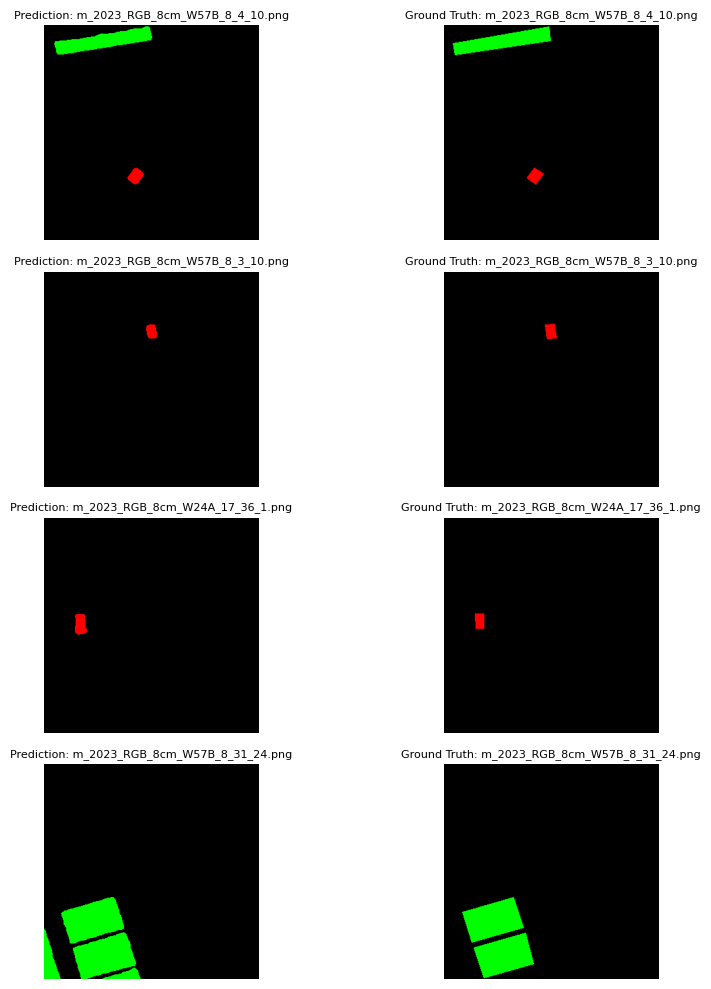

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# ───────────────────────────────
# Directory paths
pred_mask_dir = "/shared/data/climateplus2025/YOLO+U-Net_Prediction_3images_updated_head_to_head_comparision_0722/prediction_masks_tiles_320"
gt_mask_dir = "/home/cmn60/cape_town_segmentation/masks_320_1k_new"  # Set your ground truth folder here

# RGB mapping
color_map = {
    0: (0, 0, 0),        # background: black
    1: (0, 255, 0),      # PV_normal: green
    2: (255, 0, 0),      # PV_heater: red
    3: (0, 0, 255),      # PV_pool: blue
}

def mask_to_rgb(mask):
    rgb = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
    for cls, color in color_map.items():
        rgb[mask == cls] = color
    return rgb

# Get list of files from predicted mask directory
all_files = [
    f for f in os.listdir(pred_mask_dir)
    if f.endswith(".png") and os.path.isfile(os.path.join(pred_mask_dir, f))
]
sample_files = random.sample(all_files, 4)

# Plotting: 4 rows, 2 columns (prediction vs ground truth)
fig, axs = plt.subplots(len(sample_files), 2, figsize=(10, 10))

for row_idx, fname in enumerate(sample_files):
    pred_path = os.path.join(pred_mask_dir, fname)
    gt_path = os.path.join(gt_mask_dir, fname)

    pred_mask = np.array(Image.open(pred_path))
    gt_mask = np.array(Image.open(gt_path))

    pred_rgb = mask_to_rgb(pred_mask)
    gt_rgb = mask_to_rgb(gt_mask)

    axs[row_idx, 0].imshow(pred_rgb)
    axs[row_idx, 0].set_title(f"Prediction: {fname}", fontsize=8)
    axs[row_idx, 0].axis('off')

    axs[row_idx, 1].imshow(gt_rgb)
    axs[row_idx, 1].set_title(f"Ground Truth: {fname}", fontsize=8)
    axs[row_idx, 1].axis('off')

plt.tight_layout()
plt.show()
